All TPOT estimators can be created with the TPOTEstimator class. 
The TPOTClassifier and TPOTRegressor are set default parameters for the TPOTEstimator for Classification and Regression.

In [1]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.TPOTEstimator(  population_size=30,
                            generations=5,
                            scorers=['roc_auc_ovr'], #scorers can be a list of strings or a list of scorers. These get evaluated during cross validation. 
                            scorers_weights=[1],
                            classification=True,
                            n_jobs=1, 
                            early_stop=5, #how many generations with no improvement to stop after
                            
                            #List of other objective functions. All objective functions take in an untrained GraphPipeline and return a score or a list of scores
                            other_objective_functions= [ tpot2.estimator_objective_functions.average_path_length_objective,  tpot2.estimator_objective_functions.number_of_nodes_objective],
                            
                            #List of weights for the other objective functions. Must be the same length as other_objective_functions. By default, bigger is better is set to True. 
                            other_objective_functions_weights=[-1, -1],
                            verbose=1)

scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

Generation: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


1.0


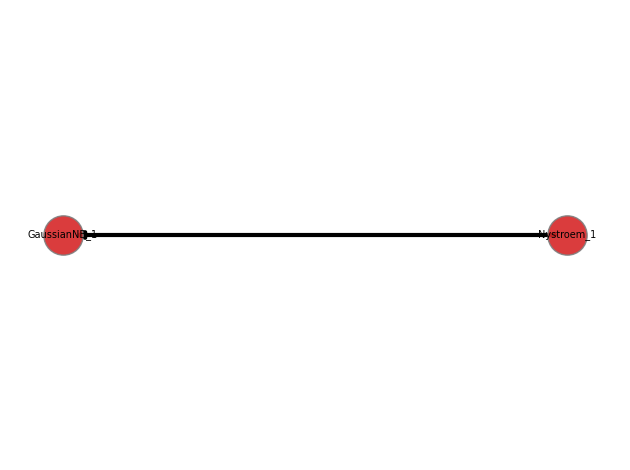

In [2]:
fitted_pipeline = est.fitted_pipeline_ # access best pipeline directly
fitted_pipeline.plot()

In [3]:
#view the summary of all evaluated individuals as a pandas dataframe
est.evaluated_individuals

,roc_auc_score,average_path_length_objective,number_of_nodes_objective,Parents,Variation_Function,Individual,Generation,Pareto_Front,Instance
0,0.994286,1.0,1.0,NaN,NaN,['LogisticRegression_1'],0.0,NaN,['LogisticRegression_1']
1,0.961607,1.0,1.0,NaN,NaN,['DecisionTreeClassifier_1'],0.0,NaN,['DecisionTreeClassifier_1']
2,0.997778,1.0,1.0,NaN,NaN,['KNeighborsClassifier_1'],0.0,NaN,['KNeighborsClassifier_1']
3,0.5,1.0,1.0,NaN,NaN,['GradientBoostingClassifier_1'],0.0,NaN,['GradientBoostingClassifier_1']
4,0.996111,1.0,1.0,NaN,NaN,['ExtraTreesClassifier_1'],0.0,NaN,['ExtraTreesClassifier_1']
...,...,...,...,...,...,...,...,...,...
145,0.994444,2.0,3.0,"(80,)",mutate,"[('LogisticRegression_1', 'SelectFwe_1'), ('Se...",4.0,NaN,"[('LogisticRegression_1', 'SelectFwe_1'), ('Se..."
146,0.997778,1.666667,3.0,"(80,)",mutate,"[('LogisticRegression_1', 'SelectFwe_1'), ('Lo...",4.0,NaN,"[('LogisticRegression_1', 'SelectFwe_1'), ('Lo..."
147,0.828194,1.0,1.0,"(87,)",mutate,['DecisionTreeClassifier_1'],4.0,NaN,['DecisionTreeClassifier_1']
148,0.995556,1.0,1.0,"(53,)",mutate,['LogisticRegression_1'],4.0,NaN,['LogisticRegression_1']


In [4]:
#view pareto front as a pandas dataframe
est.pareto_front

,roc_auc_score,average_path_length_objective,number_of_nodes_objective,Parents,Variation_Function,Individual,Generation,Pareto_Front,Instance
11,0.998889,1.0,1.0,NaN,NaN,['SVC_1'],0.0,0.0,['SVC_1']
54,1.0,1.5,2.0,"(7,)",mutate,"[('GaussianNB_1', 'Nystroem_1')]",1.0,0.0,"[('GaussianNB_1', 'Nystroem_1')]"


In [2]:
import tpot2
import sklearn
import sklearn.metrics
import sklearn.datasets

est = tpot2.tpot_estimator.templates.TPOTRegressor(n_jobs=4, max_time_seconds=10)


scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

-2541.3278166974187


In [3]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.tpot_estimator.templates.TPOTClassifier(n_jobs=4, max_time_seconds=10)


scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

terminating parallel evaluation due to timeout
0.9990249595999436
